In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

intrinsic = np.array([[1463.2,0,924.5403],[0,1462.6,412.3294],[0,0,1]], dtype=np.double)

distortion = np.array([0.0524,-0.0529, 0, 0],dtype=np.double)

In [2]:
cam = cv2.VideoCapture(0)

In [3]:
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)

True

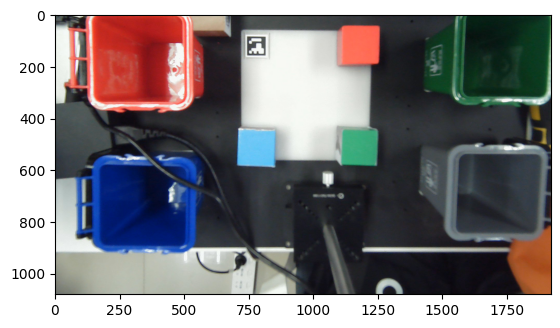

In [42]:
ret, frame = cam.read()
plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
plt.show()

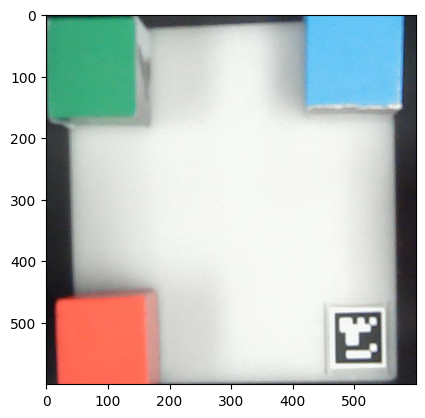

In [47]:
screen_corners3d = np.array([[145,-135,-40],[-5,-135,-40],[-5,30,-40],[145,30,-40]],dtype=np.double)

tag_size = 22.2
image_size = 600
corner1_3d = np.array([[0,0,0],[tag_size,0,0],[tag_size,tag_size,0],[0,tag_size,0]], dtype=np.double)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
if gray.shape != (1920, 1080):
    print("WARNING: image shape is not 1920x1080")
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_100)
params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, params)
tag_corners, tag_ids, _ = detector.detectMarkers(gray)
detected_tag = False
if tag_ids != None:
    for index, tid in enumerate(tag_ids):
        if tid == 1:
            detected_tag = True
            # print(corner1_3d)
            # print(tag_corners[index])
            _, rvec, tvec = cv2.solvePnP(corner1_3d, tag_corners[index], intrinsic, distortion)
            R, _ = cv2.Rodrigues(rvec)
            point2d, _ = cv2.projectPoints(screen_corners3d, R, tvec, intrinsic, distortion)
            pts1 = point2d.astype(np.float32)
            pts2 = np.array([[0, 0], [0, image_size-1], [image_size-1, image_size-1], [image_size-1, 0]], dtype=np.float32)
            M = cv2.getPerspectiveTransform(pts1, pts2)
            result = cv2.warpPerspective(frame, M, (image_size, image_size))
            #result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

if detected_tag:
    plt.figure()
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
    plt.show()
else:
    print("not detect tag")